Implementation of 101 formulaic Alphas from paper https://arxiv.org/ftp/arxiv/papers/1601/1601.00991.pdf


Stationarity
Stock prices are time series data. A stationary time series is a time series where the statistical properties of the series, including the mean, variance, and covariance at different time points, are constant and do not change over time. A stationary time series is thus characterized by a lack of observable trends or cycles in the data.

Let us take the normal distribution as an example. A normal distribution y = f (x; μ, σ) is a probability density function that maps an input x to a probability output y, assuming a fixed set of parameters: the mean μ as the central tendency and standard deviation σ as the average deviation from the mean. The specific form of the probability distribution is as follows:
$$ y=f\left(x;\mu, \sigma \right)=\frac{1}{\sqrt{2\pi {\sigma}^2}}{e}^{-\frac{{\left(x-\mu \right)}^2}{2{\sigma}^2}} $$
A widely used normal distribution is the standard normal, specifying μ = 0 and σ = 1. The resulting probability density function is
$$ y=f\left(x;\mu, \sigma \right)=\frac{1}{\sqrt{2\pi }}{e}^{-\frac{x^2}{2}} $$
We can generate random samples following this specific form using the random.normal() function from NumPy. In Listing 8-1, we define a function generate_normal_sample() that generates a normally distributed random sample by passing in the input parameter μ and σ in 

Stationary series ==> a normal distribution with mean = 0 and standard deviation =1
        np.random.normal(mean, sd) ========> example of 1 sample output 0.09120471661981977
        stationary_list.append(generate_normal_sample([0,1]))
        
Non Stationary series#1 ==> increasing mean , std = 1
        nonstationary_list1.append(generate_normal_sample([i,1]))
        
Non Stationary series#2 ==> increasing mean , increasing std
        nonstationary_list2.append(generate_normal_sample([i,np.sqrt(i)]))
         list.


In [44]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

from itertools import combinations

# download data from yfinance
start_date  = "2020-01-01"
end_date  = "2023-12-04"
stocks = ['TSLA','RIVN']
df = yf.download(stocks, start=start_date, end=end_date)['Adj Close'].dropna()
#create stock pairs
stock_pairs = list(combinations(df.columns,2))
coin_dict = {"EG": [], "NOT_EG": []}
pvalue_dict = {"EG": 0, "ADF1": 0,"ADF2": 0}
print(pvalue_dict)
def calculate_pvalue(pair,df):
    for pair in stock_pairs:
        Y = df[pair[0]]
        X = df[pair[1]]
        df_temp = df[list(pair)] # subset df based on current pair of stocks
        score, pvalue, _ = coint(df_temp.values[:,0], df_temp.values[:,1])
        pvalue_dict["EG"].append(pvalue)
# estimate linear regression coefficients of stock1 on stock2
        X_with_constant = sm.add_constant(X)
        model = OLS(Y, X_with_constant).fit()
        residuals = Y - model.predict()
        residuals2 = Y - (model.params['const'] + model.params[pair[1]] * X)
        # test stationarity of the residuals
        adf_test1 = adfuller(residuals)
        adf_test2 = adfuller(residuals2)
        pvalue_dict["ADF1"].append(adf_test1[1])
        pvalue_dict["ADF2"].append(adf_test2[1])
        
    for key,value in pvalue_dict.items():
        
        if value > 0.05:
            break
        else:
            print(f"{pair} is cointegrated")

    print(f"{pair} is not cointegrated")
    return pvalue_dict
    
print(calculate_pvalue(stock_pairs,df))
    
    
	

[*********************100%%**********************]  2 of 2 completed
{'EG': 0, 'ADF1': 0, 'ADF2': 0}


AttributeError: 'int' object has no attribute 'append'

In [37]:
def check_cointegration(pair, pvalue, threshold):
    if pvalue < threshold:
        print(pair, 'are cointegrated')
        coin_dict["EG"].append(pair)
    else:
        print(pair, 'are not cointegrated')
        coin_dict["NOT_EG"].append(pair)

coin_dict = {"EG": [], "NOT_EG": []}


# Check cointegration for multiple pairs
pairs = [("AAPL", "MSFT"), ("GOOG", "MSFT"), ("AMZN", "MSFT")]
for pair in pairs:
    #pvalue = calculate_pvalue(pair)  # Assume a function to calculate pvalue
    check_cointegration(pair, pvalue=0.06, threshold=0.05)

print(coin_dict)

('AAPL', 'MSFT') are not cointegrated


KeyError: 'NOT_EG'

[*********************100%%**********************]  2 of 2 completed
             RIVN        TSLA
count  518.000000  518.000000
mean    34.855531  247.632130
std     26.897933   61.379992
min     12.000000  108.099998
25%     17.740000  200.935001
50%     27.270000  245.174995
75%     36.167500  290.225830
max    172.009995  399.926666
Engle-Granger test for cointegration on each pair of stocks
('RIVN', 'TSLA') are cointegrated
ADF test for cointegration on each pair of stocks
const   -42.981874
TSLA      0.314327
dtype: float64
False
ADF test statistic: -3.943672291951538
p-value: 0.001735945518920555
RES1==>('RIVN', 'TSLA') are cointegrated.
ADF test statistic: -3.943672291951536
p-value: 0.0017359455189205706
RES2==>('RIVN', 'TSLA') are cointegrated.


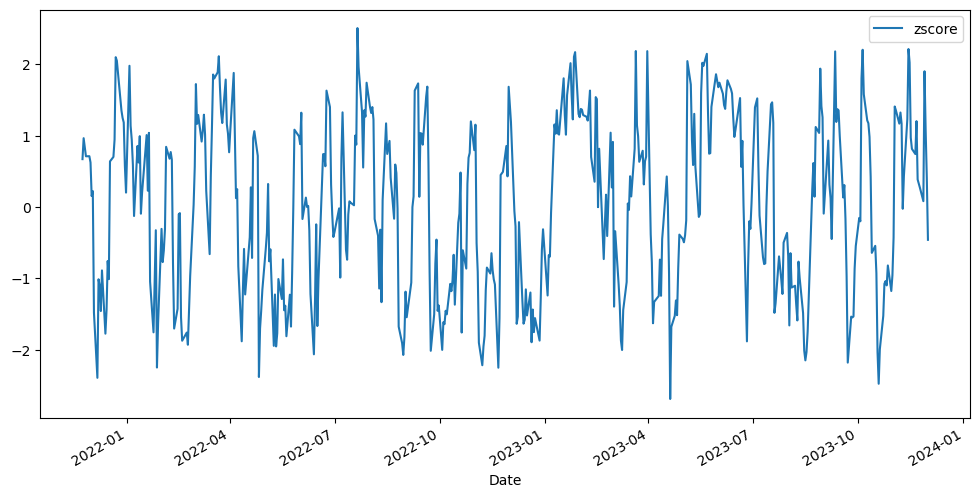

C:\Users\MAYANK DANGWAL\AppData\Local\Temp\ipykernel_13988\3849598739.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if zscore[i] < -entry_threshold and stock1_position[i-1] == 0:
C:\Users\MAYANK DANGWAL\AppData\Local\Temp\ipykernel_13988\3849598739.py:114: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elif zscore[i] > entry_threshold and stock2_position[i-1] == 0:
C:\Users\MAYANK DANGWAL\AppData\Local\Temp\ipykernel_13988\3849598739.py:118: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame b

total_returns : Date
2021-11-23    0.0
2021-11-24    0.0
2021-11-26   -0.0
2021-11-29    0.0
2021-11-30    0.0
             ... 
2023-11-27    0.0
2023-11-28    0.0
2023-11-29   -0.0
2023-11-30   -0.0
2023-12-01    0.0
Length: 509, dtype: float64


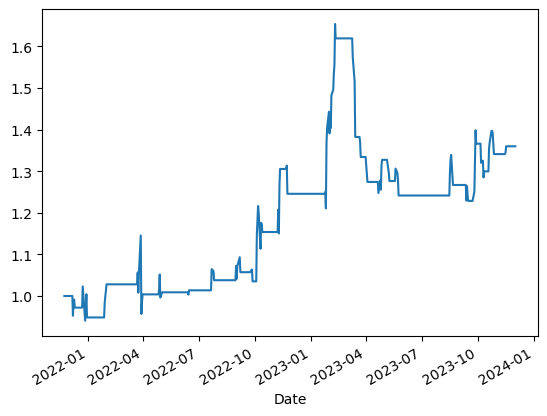

In [29]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import coint
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

from itertools import combinations

SEED = 8
random.seed(SEED)
np.random.seed(SEED)
# download data from yfinance
start_date  = "2020-01-01"
end_date  = "2023-12-04"
#stocks = ['GOOG','MSFT']  ## NOT COIN
stocks = ['TSLA','RIVN']
#stocks = ['GOOG','MSFT','AAPL','TSLA','META','NFLX']
#stocks = ['RIVN','TSLA','SPY','AAPL']
df = yf.download(stocks, start=start_date, end=end_date)['Adj Close'].dropna()
print(df.describe())
stock_pairs = list(combinations(df.columns,2))
#print(stock_pairs)
threshold = 0.05
print("Engle-Granger test for cointegration on each pair of stocks")
# run Engle-Granger test for cointegration on each pair of stocks
for pair in stock_pairs:
    # subset df based on current pair of stocks
    df2 = df[list(pair)]
    # perform test for the current pair of stocks
    score, pvalue, _ = coint(df2.values[:,0], df2.values[:,1])
    # check if the current pair of stocks is cointegrated
    if pvalue < threshold:
        print(pair, 'are cointegrated')
    else:
        print(pair, 'are not cointegrated')

print("ADF test for cointegration on each pair of stocks")
for pair in stock_pairs:
    Y = df[pair[0]]
    X = df[pair[1]]
# estimate linear regression coefficients of stock1 on stock2
    X_with_constant = sm.add_constant(X)
    model = OLS(Y, X_with_constant).fit()
    residuals = Y - model.predict()
# access model weights
    print(model.params)
# alternative approach
    residuals2 = Y - (model.params['const'] + model.params[pair[1]] * X)
# check if both residuals are the same
    print(residuals.equals(residuals2))
# test stationarity of the residuals
    adf_test1 = adfuller(residuals)
    adf_test2 = adfuller(residuals2)
#########using residuals
    print(f"ADF test statistic: {adf_test1[0]}")
    print(f"p-value: {adf_test1[1]}")
    if adf_test1[1] < 0.05:
        print(f"RES1==>{pair} are cointegrated.")
    else:
        print(f"RES1==>{pair} are not cointegrated.")

    #########using residuals2
    print(f"ADF test statistic: {adf_test2[0]}")
    print(f"p-value: {adf_test2[1]}")
    if adf_test2[1] < 0.05:
        print(f"RES2==>{pair} are cointegrated.")
    else:
        print(f"RES2==>{pair} are not cointegrated.")

###Obtaining the Spread :: # calculate the spread for RIVN and TSLA
Y = df["TSLA"]
X = df["RIVN"]
# estimate linear regression coefficients
X_with_constant = sm.add_constant(X)
model = OLS(Y, X_with_constant).fit()
# obtain the spread as the residuals
spread = Y - model.predict()
#spread.plot(figsize=(12,6),label="spread")

##Converting to Z-Scores
# derive mean and sd using a moving window
window_size = 10
spread_mean = spread.rolling(window=window_size).mean()
spread_std = spread.rolling(window=window_size).std()
zscore = (spread - spread_mean) / spread_std
first_valid_idx = zscore.first_valid_index()
zscore = zscore[first_valid_idx:]
zscore.plot(figsize=(12,6),label="zscore")
plt.legend();
plt.show()

# set the threshold values for entry and exit signals
entry_threshold = 2.0
exit_threshold = 1.0
# initialize the daily positions to be zeros
stock1_position = pd.Series(data=0, index=zscore.index)
stock2_position = pd.Series(data=0, index=zscore.index)

# generate daily entry and exit signals for each stock
for i in range(1, len(zscore)):
# zscore<-2 and no existing long position for stock 1
    if zscore[i] < -entry_threshold and stock1_position[i-1] == 0:
        stock1_position[i] = 1 # long stock 1
        stock2_position[i] = -1 # short stock 2
# zscore>2 and no existing short position for stock 2
    elif zscore[i] > entry_threshold and stock2_position[i-1] == 0:
        stock1_position[i] = -1 # short stock 1
        stock2_position[i] = 1 # long stock 2
# -1<zscore<1
    elif abs(zscore[i]) < exit_threshold:
        stock1_position[i] = 0 # exit existing position
        stock2_position[i] = 0
        # -2<zscore<-1 or 1<zscore<2
    else:
        stock1_position[i] = stock1_position[i-1] # maintain existing position
        stock2_position[i] = stock2_position[i-1]
        #Calculate the returns of each stock
stock1_returns = (df["RIVN"][first_valid_idx:].pct_change() * stock1_position.shift(1)).fillna(0)
stock2_returns = (df["TSLA"][first_valid_idx:].pct_change() * stock2_position.shift(1)).fillna(0)
# calculate the total returns of the strategy
total_returns = stock1_returns + stock2_returns
cumulative_returns = (1 + total_returns).cumprod()
# plot the cumulative returns
cumulative_returns.plot()
#print(f"cumulative_returns : {cumulative_returns}")
print(f"total_returns : {total_returns}")

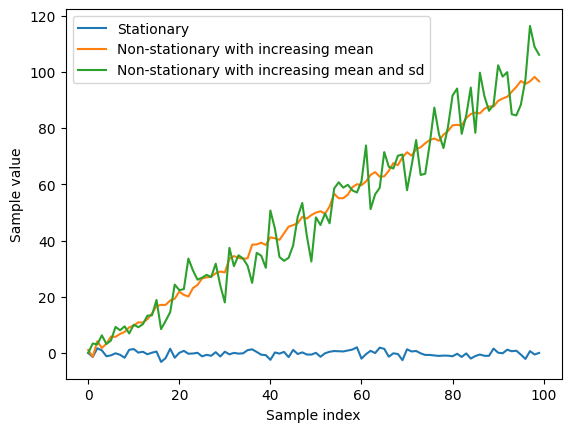

[*********************100%%**********************]  2 of 2 completed
const      8163.928829
ETH-USD      12.068744
dtype: float64
True
ADF test statistic: -2.438686335758598
p-value: 0.1311137769982459
RES1==>The two stocks are not cointegrated.
ADF test statistic: -2.438686335758598
p-value: 0.1311137769982459
RES2==>The two stocks are not cointegrated.


In [1]:
import os
import random
import numpy as np
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from matplotlib import pyplot as plt
%matplotlib inline

SEED = 8
random.seed(SEED)
np.random.seed(SEED)
# download data from yfinance
start_date  = "2020-01-01"
end_date  = "2023-03-18"
#stocks = ['GOOG','MSFT']  ## NOT COIN
#stocks = ['TSLA','RIVN']
stocks = ['BTC-USD', 'ETH-USD']

# generate random samples from normal distribution
def generate_normal_sample(params):
    mean = params[0]
    sd = params[1]
    return np.random.normal(mean, sd)

# generate 100 random samples for both stationary and non-stationary distribution
T = 100
stationary_list, nonstationary_list1, nonstationary_list2 = [], [], []
for i in range(T):
    # generate a stationary sample and append to list
    stationary_list.append(generate_normal_sample([0,1]))
    # generate a non-stationary sample with an increasing mean and append to list
    nonstationary_list1.append(generate_normal_sample([i,1]))
    # # generate a non-stationary sample with an increasing mean and sd and append to list
    nonstationary_list2.append(generate_normal_sample([i,np.sqrt(i)]))

x = range(T)
# plot the lists as line plots with labels for each line
plt.plot(x, stationary_list, label='Stationary')
plt.plot(x, nonstationary_list1, label='Non-stationary with increasing mean')
plt.plot(x, nonstationary_list2, label='Non-stationary with increasing mean and sd')
# set the axis labels
plt.xlabel('Sample index')
plt.ylabel('Sample value')
# add a legend
plt.legend()
# show the plot
plt.show()
""" 
input:  x: a list of scalar values, threshold: significance level
output: print out message on stationarity
"""
# test for stationarity
def stationarity_test(x, threshold=0.05):

    pvalue = adfuller(x)[1]
    if pvalue < threshold:
        return 'p-value is ' + str(pvalue) + '. The series is likely stationary.'
    else:
        return 'p-value is ' + str(pvalue) + '. The series is likely non-stationary.'

#print(stationarity_test(stationary_list))
#print(stationarity_test(nonstationary_list1))
#print(stationarity_test(nonstationary_list2))
           
##p-value is 1.2718058919122438e-12. The series is likely stationary.
##p-value is 0.9925665941220737. The series is likely non-stationary.
#p-value is 0.9120355459829741. The series is likely non-stationary.

df = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# build linear regression model
# Extract prices for two stocks of interest
# target var: Y; predictor: X
Y = df[stocks[0]]
X = df[stocks[1]]
# estimate linear regression coefficients of stock1 on stock2
X_with_constant = sm.add_constant(X)
model = OLS(Y, X_with_constant).fit()
residuals = Y - model.predict()
# access model weights
print(model.params)
# alternative approach
residuals2 = Y - (model.params['const'] + model.params[stocks[1]] * X)
# check if both residuals are the same
print(residuals.equals(residuals2))
# test stationarity of the residuals
adf_test1 = adfuller(residuals)
adf_test2 = adfuller(residuals2)
#########using residuals
print(f"ADF test statistic: {adf_test1[0]}")
print(f"p-value: {adf_test1[1]}")
if adf_test1[1] < 0.05:
    print("RES1==>The two stocks are cointegrated.")
else:
    print("RES1==>The two stocks are not cointegrated.")

#########using residuals2
print(f"ADF test statistic: {adf_test2[0]}")
print(f"p-value: {adf_test2[1]}")
if adf_test2[1] < 0.05:
    print("RES2==>The two stocks are cointegrated.")
else:
    print("RES2==>The two stocks are not cointegrated.")

